In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer
import highlight_text #to install make sure you do pip install highlight-text in your command line
from mplsoccer import Bumpy, FontManager, add_image
import numpy as np
import json
from urllib.request import urlopen
from PIL import Image
from io import BytesIO
import requests


In [2]:
df = pd.read_csv('C:\\Users\\Amin\\Documents\\manutd(2012-2021)\\standings(19-20).csv')

In [3]:
df.head()

,Team,Liverpool,Manchester City,Manchester Utd,Chelsea
0,Week 1,3,1,2,19
1,Week 2,1,3,4,15
2,Week 3,1,2,5,13
3,Week 4,1,2,8,11
4,Week 5,1,2,4,6


In [4]:
df=df.T

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
Team,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 29,Week 30,Week 31,Week 32,Week 33,Week 34,Week 35,Week 36,Week 37,Week 38
Liverpool,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Manchester City,1,3,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Manchester Utd,2,4,5,8,4,8,10,12,14,7,...,5,5,5,5,5,5,5,5,3,3
Chelsea,19,15,13,11,6,11,7,5,4,4,...,4,4,4,4,4,3,3,3,4,4


In [6]:
#reset the column names so that we drop the transposed team names
df.columns = df.iloc[0]
df = df.iloc[1:]

In [7]:
df.head()

Team,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 29,Week 30,Week 31,Week 32,Week 33,Week 34,Week 35,Week 36,Week 37,Week 38
Liverpool,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Manchester City,1,3,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Manchester Utd,2,4,5,8,4,8,10,12,14,7,...,5,5,5,5,5,5,5,5,3,3
Chelsea,19,15,13,11,6,11,7,5,4,4,...,4,4,4,4,4,3,3,3,4,4


In [8]:
df=df.T

In [9]:
df.head()

,Liverpool,Manchester City,Manchester Utd,Chelsea
Team,,,,
Week 1,3,1,2,19
Week 2,1,3,4,15
Week 3,1,2,5,13
Week 4,1,2,8,11
Week 5,1,2,4,6


In [10]:
week = ['Week ' + str(num) for num in range(1,39)]

In [11]:
#highlight dictionary to pass in the color. search team color codes in google to get your teams hex colors
highlight_dict = {
    'Manchester City':'#6CABDD',
    'Manchester Utd':'#DA291C',
    'Liverpool':'#EDBB00',
    'Chelsea':'#034694'
}

In [12]:
bumpy = Bumpy(
    scatter_color = '#282828', line_color = '#252525',
    rotate_xticks=90,
    ticklabel_size = 15,
    scatter_primary = 'D',
    show_right = True,
    plot_labels = True,
    alignment_yvalue=.1,
    alignment_xvalue = .065
)

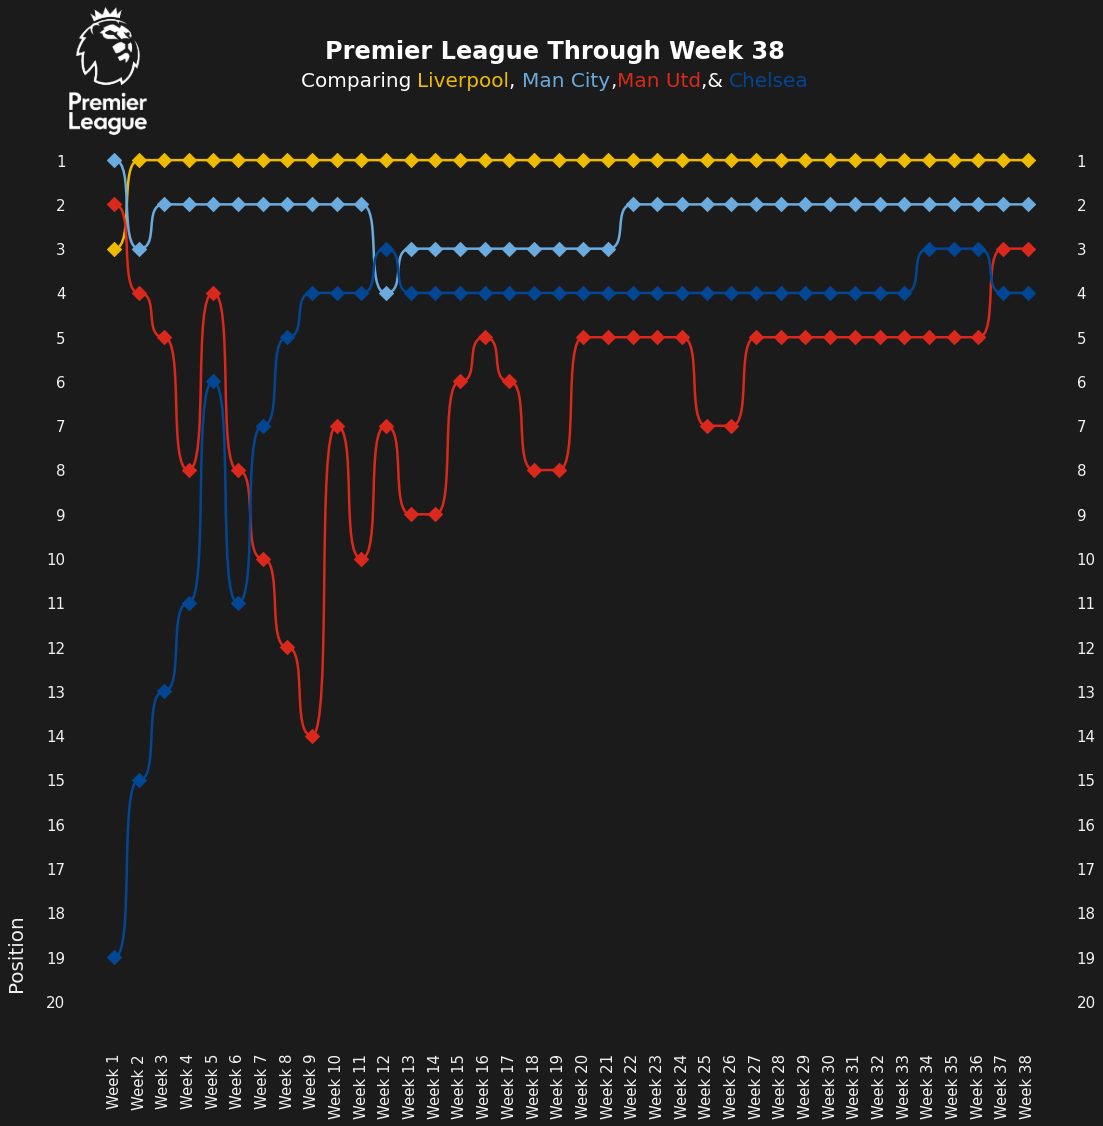

In [13]:
fig,ax = bumpy.plot(
    x_list = week,
    y_list = np.linspace(1,20,20).astype(int),
    values = df,
    secondary_alpha = .5,
    highlight_dict = highlight_dict,
    figsize = (18,18),
    y_label = 'Position',
    ylim = (-.1,22),
    lw = 2.5
)

fig.text(s = 'Premier League Through Week 38',x = .5, y = .89,
         c = 'white',size=24,weight='bold',ha='center'
        )
highlight_text.fig_text(x=.5, y= .88, 
                       s = 'Comparing <Liverpool>, <Man City>,<Man Utd>,& <Chelsea>',
                       highlight_textprops = [
                           {"color":'#EDBB00'},
                           {"color":'#6CABDD'},
                           {"color":'#DA291C'},
                           {"color":'#034694'}
                       ],
                        fontsize = 20,
                        color = 'white',
                        ha='center'
                       )

ax2 = fig.add_axes([.10,.83,.11,.10])
ax2.axis('off')
img = Image.open('C:\\Users\\Amin\\Documents\\manutd(2012-2021)\\PLicon.png')
ax2.imshow(img)

